In [5]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate,RGate, XGate
import numpy as np

# Single Qubit Circuits

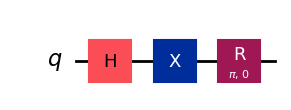

In [6]:
#Method 1
qc = QuantumCircuit(1)

qc.append(HGate(),[0])
qc.append(XGate(),[0])
qc.append(RGate(np.pi, 0),[0])

qc.draw('mpl')

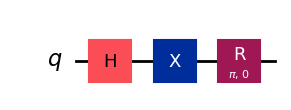

In [7]:
#Method 2
qc_1 = QuantumCircuit(1)

qc_1.h(0)
qc_1.x(0)
qc_1.r(np.pi,0,0)

qc_1.draw('mpl')

# Compose and Decompose Cicuits

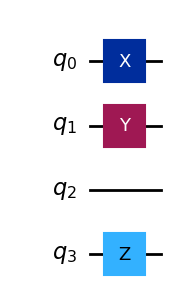

In [8]:
qc_a = QuantumCircuit(4)
qc_a.x(0)

qc_b = QuantumCircuit(2)
qc_b.y(0)
qc_b.z(1)

#appends Y gate to q1 and Z gate to q3 for the circuit qc_a and returns a new circuit qc_ab
qc_ab = qc_a.compose(qc_b, qubits=[1,3])
qc_ab.draw('mpl')

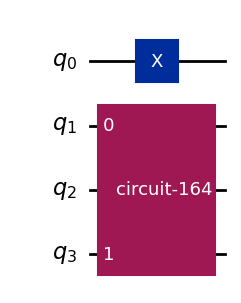

In [9]:
#Returns equivalent circuit as above, but replaces qc_b as an instruction for simplicity
instruction = qc_b.to_instruction()
qc_a.append(instruction, [1,3])

qc_a.draw('mpl')

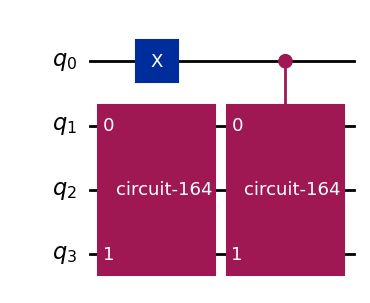

In [12]:
#Introduce gate if circuit is unitary, plus control() adds quantum control
gate = qc_b.to_gate().control()
qc_a.append(gate,[0,1,3])
qc_a.draw('mpl')

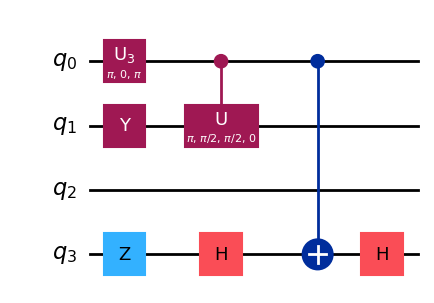

In [13]:
#Keep in mind HXH = Z and HZH = X
qc_a.decompose().draw('mpl')

# Parametrized Circuits

In [14]:
from qiskit.circuit import Parameter

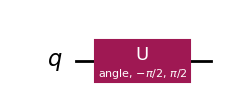

In [16]:
angle = Parameter("angle")  # undefined number
 
# Create and optimize circuit once
qc = QuantumCircuit(1)
qc.rx(angle, 0)
 
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
qc = generate_preset_pass_manager(optimization_level=3, basis_gates=['u', 'cx']).run(qc)
 
qc.draw("mpl")

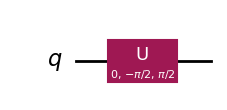

In [22]:
circuits = []

for val in range(100):
    circuits.append(qc.assign_parameters({angle:val}))
    
circuits[0].draw('mpl')

In [23]:
qc.parameters

ParameterView([Parameter(angle)])